In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pydotplus
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "iris_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print("Decision Tree {} saved as png file".format(iteration + 1))

In [4]:
iris = load_iris()
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
model = RandomForestClassifier(n_estimators=5)
model.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=405829150, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=265870096, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weig

In [7]:
model.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=405829150, splitter='best')

In [8]:
len(model.estimators_)

5

In [9]:
for i in range(len(model.estimators_)):
    save_decision_trees_as_png(model.estimators_[i], i, feature_names, target_names)

Decision Tree 1 saved as png file
Decision Tree 2 saved as png file
Decision Tree 3 saved as png file
Decision Tree 4 saved as png file
Decision Tree 5 saved as png file


In [10]:
images = [ PIL.Image.open(f) for f in glob('./*.png') ]

In [11]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1337x1008 at 0x122F206A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1268x856 at 0x122F91978>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=604x856 at 0x122F86710>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1216x856 at 0x122F80128>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=805x856 at 0x122F80198>]

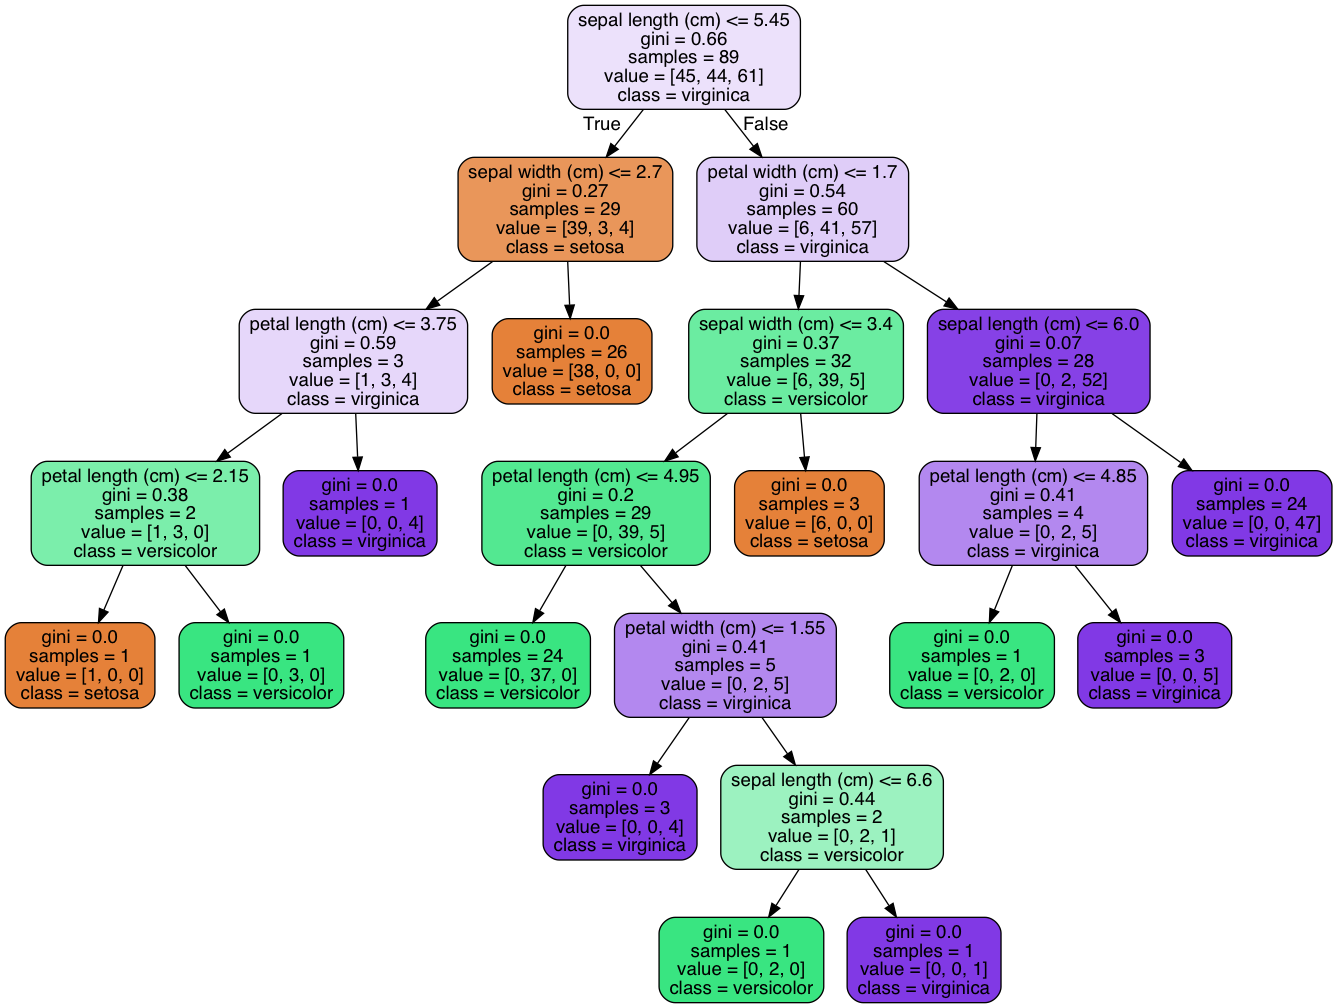

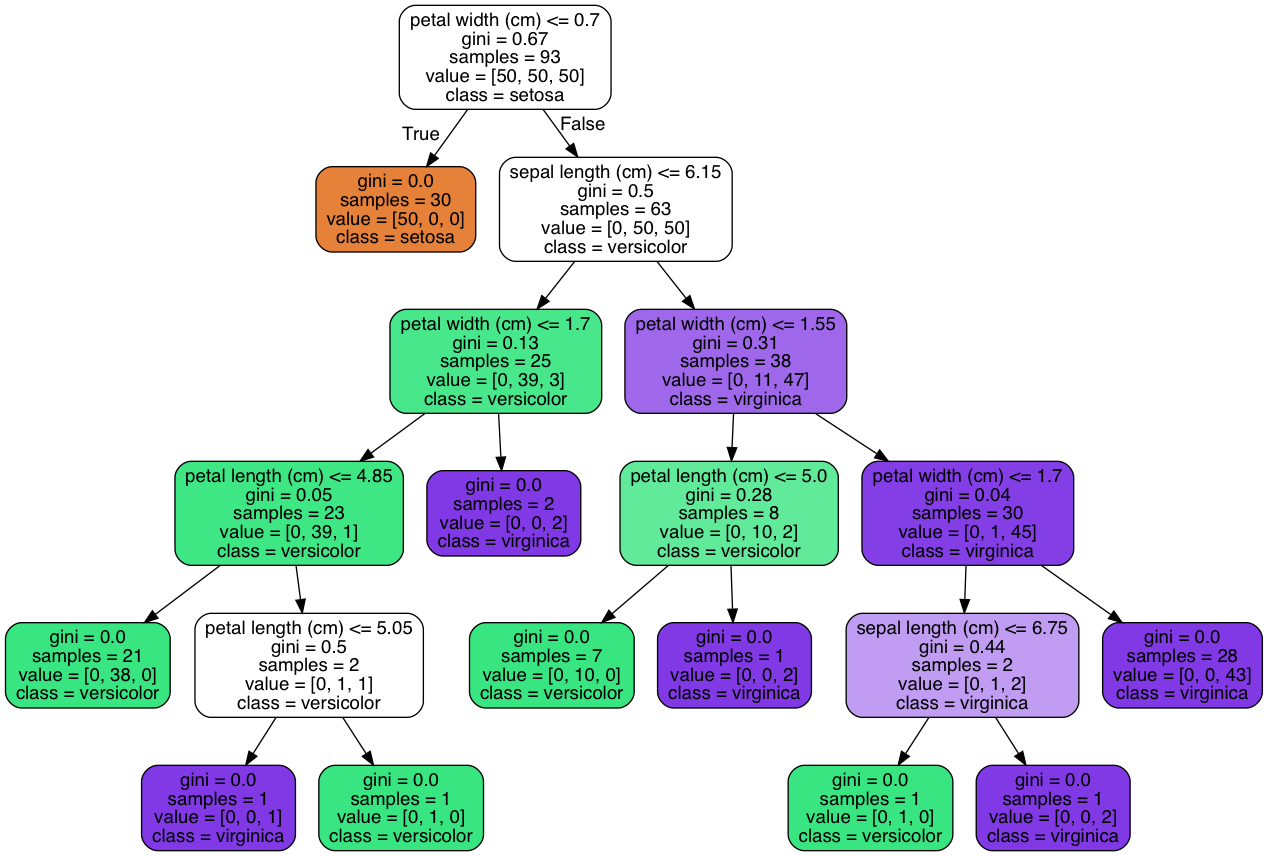

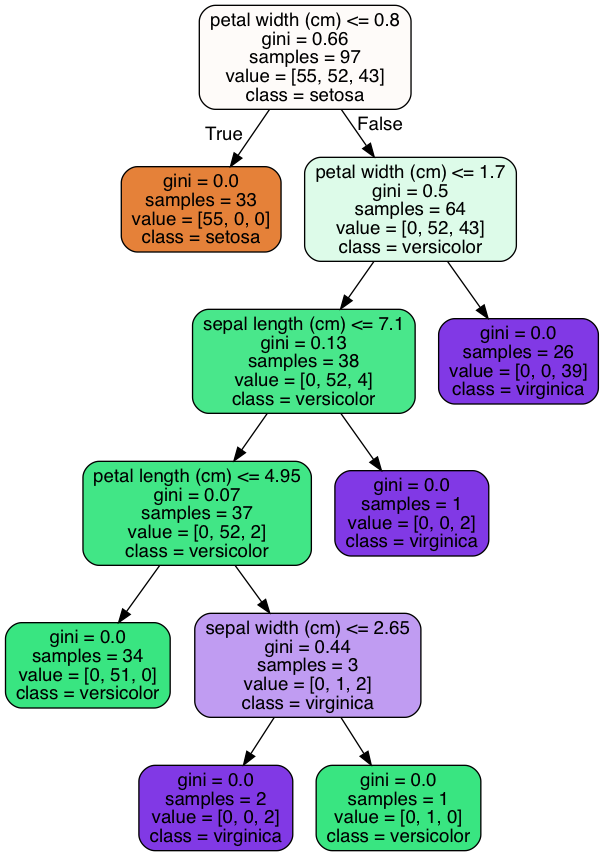

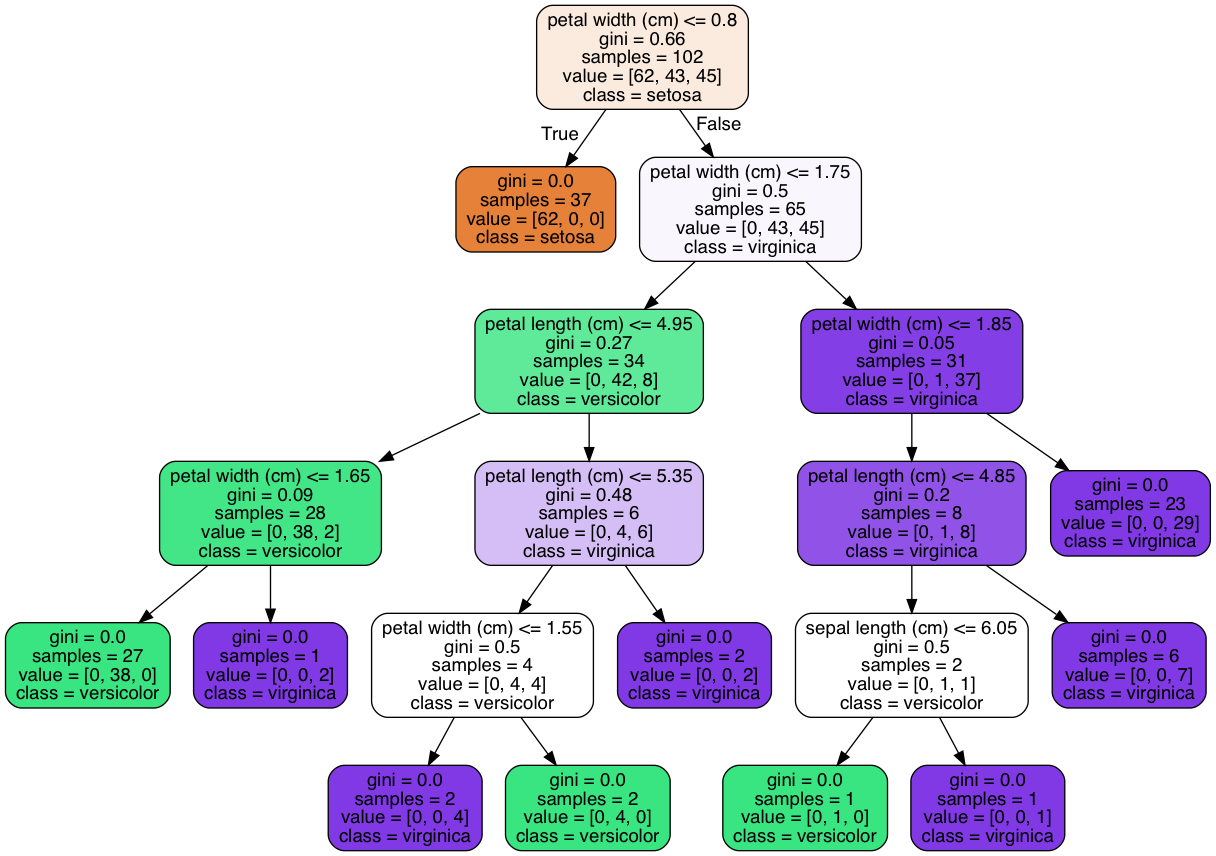

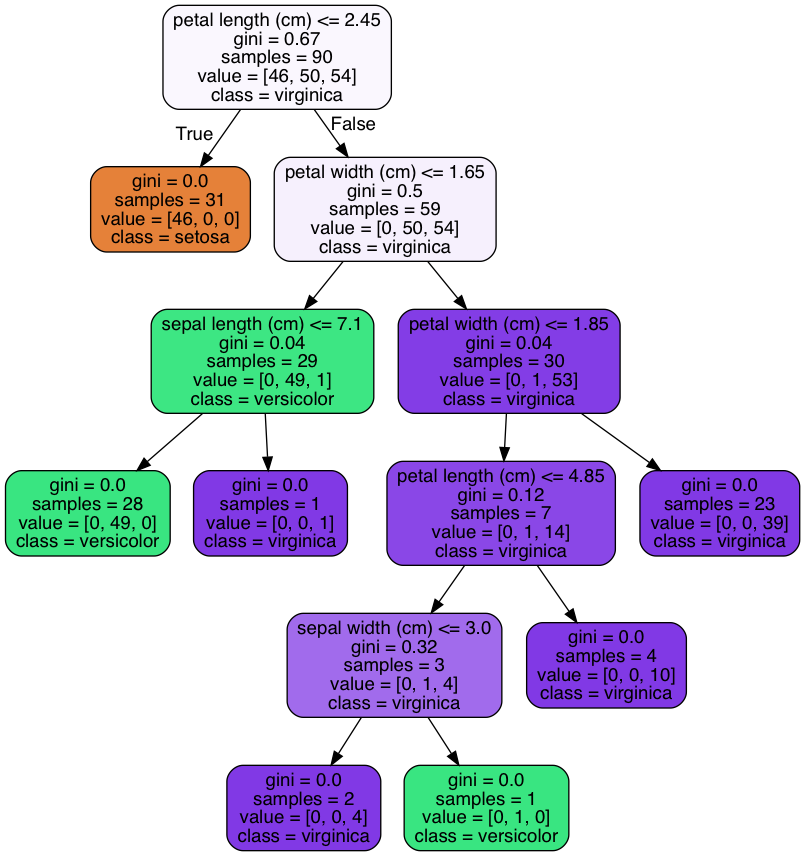

In [12]:
for im in images:
    display(Image(filename=im.filename, retina=True))